#Model Using Maths (finding Bo,B1,B2...)

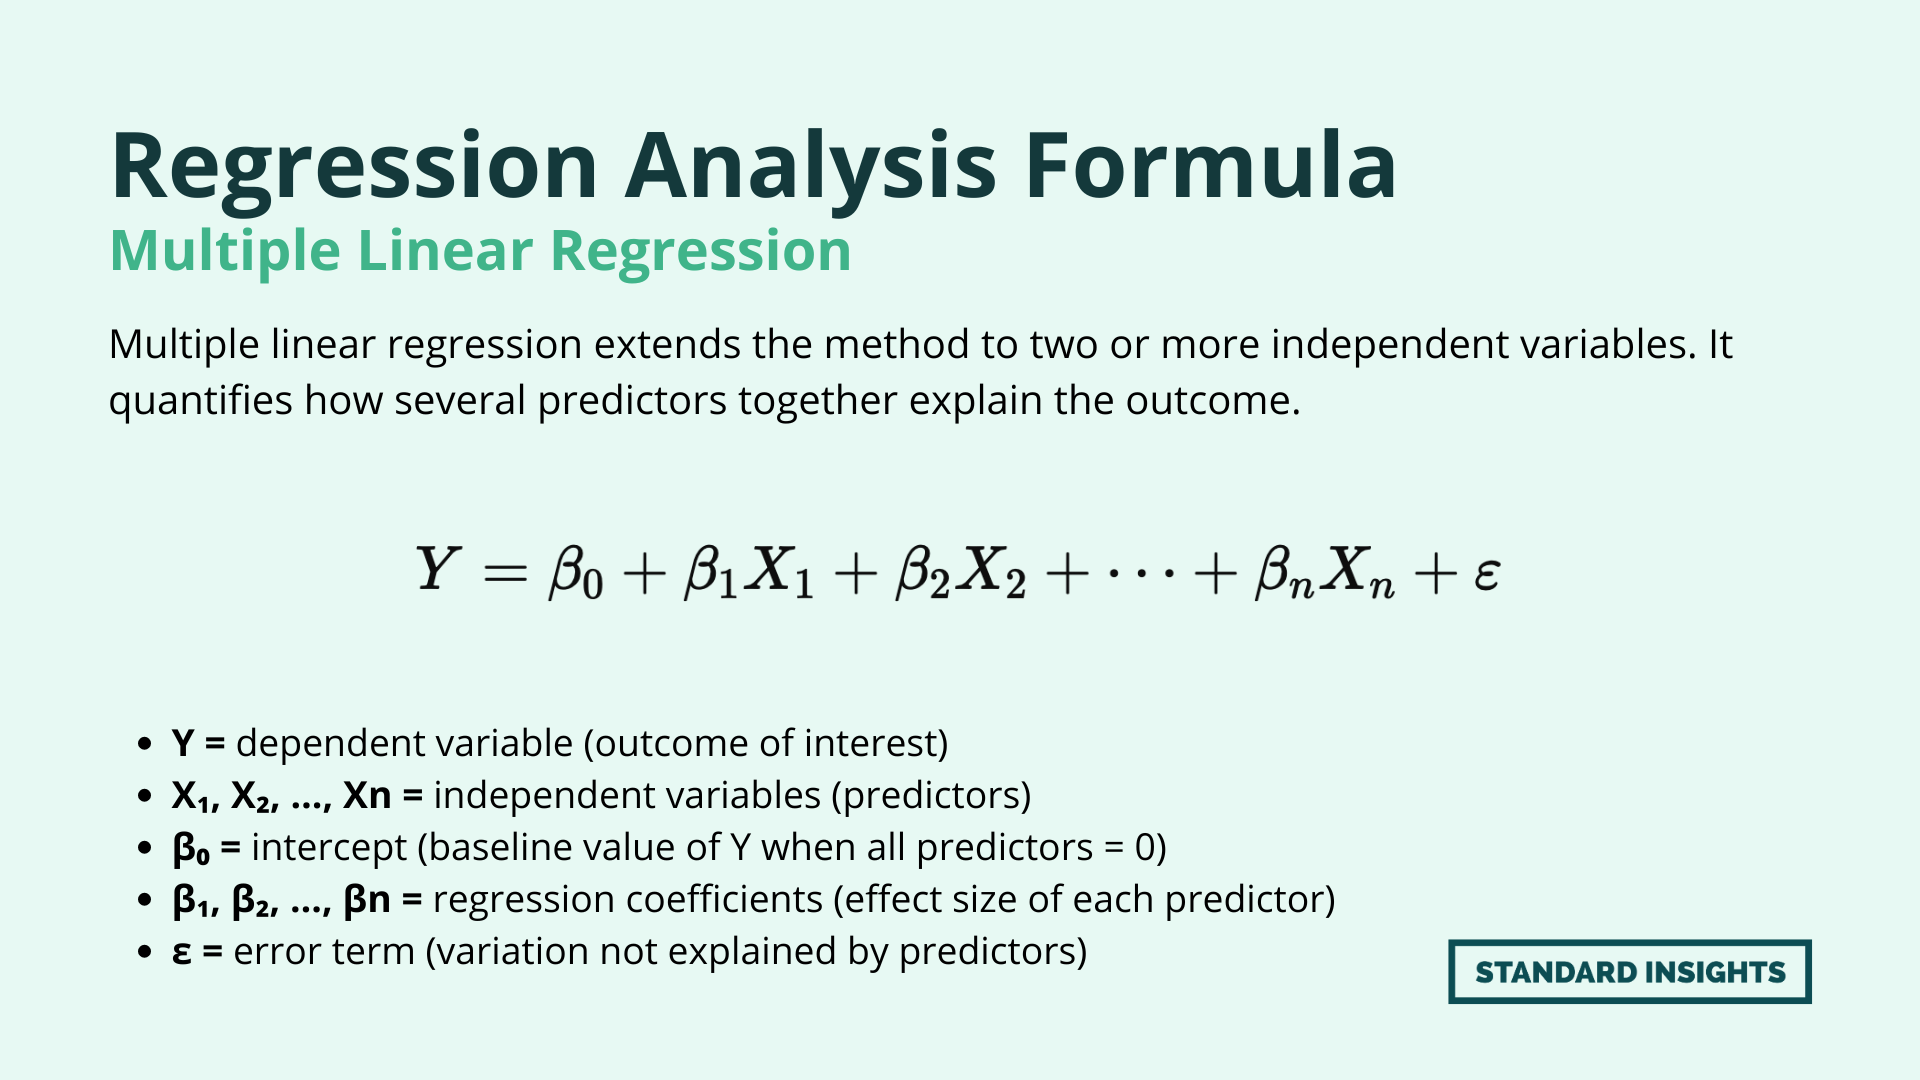

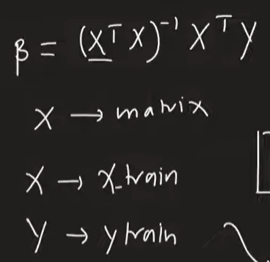

we will use the formula of Beta in below solution

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [4]:

X,y=load_diabetes(return_X_y=True)

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
X.shape

(442, 10)

In [8]:
y.shape

(442,)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


#Prediction Using Scikit LinearRegression()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.4526027629719195


In [21]:
#Coefficients(B1,B2,B3.....,B10)
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [22]:

#Intercept of plane passing  Bo
lr.intercept_

np.float64(151.34560453985995)

#Prediction using Our Own Class from formula

In [36]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)   #adding a column in X wali metrix with all value =1,
         #(np.insert(kon se array me change , kis index par,what chnges ,axis))

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        #numpy.linearalgebra.incerse(metrix) gives inverse of metrix
        #np.dot used for dot product

        self.intercept_ = betas[0]  # intercept will Bo(Beta not)
        self.coef_ = betas[1:]  # rest of all comns will Coeficient B1,B2,....B10

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred


In [37]:
lr=MeraLR()

In [38]:
lr.fit(X_train,y_train)

In [40]:
y_pred=lr.predict(X_test)

In [41]:
r2_score(y_test,y_pred)

0.4526027629719199

In [42]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [43]:
lr.intercept_

np.float64(151.34560453986003)